<a href="https://colab.research.google.com/github/MasoodaAntule/ANN-project/blob/main/Diabetes_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_diabetes

# Load the Diabetes dataset
diabetes = load_diabetes()

# Access the data and target variables
X, Y = diabetes.data, diabetes.target


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
X = pd.DataFrame(X)
X.columns = ["x1","x2","x3","x4","x5","x6","x7","x8","x9","x10"]
X.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [ ]:
Y=pd.DataFrame(Y)
Y.columns =["target"]
Y.head()

,target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


# --pip install --upgrade tensorflow --user pip install keras --user pip install nltk
# -- pip install opencv-python

In [ ]:
pip install --upgrade tensorflow

# **Check** **missing** **Values**

In [ ]:
X.isnull().sum()     # or isna().sum()

x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
dtype: int64

In [ ]:
Y.isnull().sum()

target    0
dtype: int64

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size = 0.2,random_state =25)

# Scalling with Standar Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
Scaler = StandardScaler()
xtrain = pd.DataFrame(Scaler.fit_transform(xtrain),columns = xtrain.columns)
xtest = pd.DataFrame(Scaler.transform(xtest),columns = xtest.columns)

In [ ]:
xtrain.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,1.167151,1.092038,0.220741,1.013597,-0.076024,-0.243710,-0.914308,0.737125,1.329457,0.687396
1,0.617707,1.092038,1.267889,1.157320,-0.459400,0.039077,-0.686565,-0.031825,-0.525470,-0.373759
2,0.696199,-0.915719,0.402854,1.157320,0.277862,-1.131529,-1.445710,1.506076,2.831139,0.156818
3,-1.423084,-0.915719,0.767079,-0.495491,-0.636343,-0.381815,-0.155163,-0.031825,-0.550560,-1.169625
4,0.539215,1.092038,0.539438,0.294984,0.572767,1.032118,-0.838394,0.737125,0.181808,0.510537


In [ ]:
xtest.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,1.010167,1.092038,2.610971,1.732211,-2.228830,-2.104841,-1.445710,-0.031825,0.806110,-0.639048
1,-1.737052,1.092038,1.654879,1.085459,1.693406,1.367516,0.528069,-0.031825,0.893433,-0.196900
2,-1.580068,-0.915719,-1.213397,-1.717134,-0.960738,-0.592261,-0.914308,-0.031825,0.036797,-0.108470
3,0.382231,1.092038,-0.257305,1.444766,-0.223476,0.164029,-0.838394,0.737125,0.128664,0.068389
4,-1.423084,-0.915719,-0.689823,-0.711075,0.041938,0.519156,-0.534735,-0.031825,-0.476079,-1.258055


In [ ]:
xtrain.shape

(353, 10)

In [ ]:
xtest.shape

(89, 10)

# Buliding Neural Network with keras

In [ ]:
pip install keras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
n_n =  Sequential()
n_n.add(Dense(64,input_dim =xtrain.shape[1],activation="relu"))  # INPUT
n_n.add(Dense(32,activation="relu"))                   # HIDDEN
n_n.add(Dense(1,activation="linear"))           # OUTPUT

In [ ]:
n_n.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                704       
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2817 (11.00 KB)
Trainable params: 2817 (11.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________



# loss function

In [ ]:
n_n.compile(loss="mae",optimizer = "adam")

In [ ]:
hist = n_n.fit(xtrain,ytrain,validation_split = 0.2,epochs = 100,batch_size=32)

Epoch 1/100
9/9 [==============================] - 1s 17ms/step - loss: 152.6607 - val_loss: 146.4981
Epoch 2/100
9/9 [==============================] - 0s 6ms/step - loss: 152.0166 - val_loss: 145.8345
Epoch 3/100
9/9 [==============================] - 0s 4ms/step - loss: 151.3022 - val_loss: 145.0737
Epoch 4/100
9/9 [==============================] - 0s 6ms/step - loss: 150.4779 - val_loss: 144.1481
Epoch 5/100
9/9 [==============================] - 0s 7ms/step - loss: 149.4568 - val_loss: 142.9998
Epoch 6/100
9/9 [==============================] - 0s 4ms/step - loss: 148.1726 - val_loss: 141.5456
Epoch 7/100
9/9 [==============================] - 0s 4ms/step - loss: 146.5513 - val_loss: 139.6941
Epoch 8/100
9/9 [==============================] - 0s 4ms/step - loss: 144.4742 - val_loss: 137.3634
Epoch 9/100
9/9 [==============================] - 0s 6ms/step - loss: 141.8632 - val_loss: 134.4603
Epoch 10/100
9/9 [==============================] - 0s 5ms/step - loss: 138.6045 - val_los

# Visualsation of model training

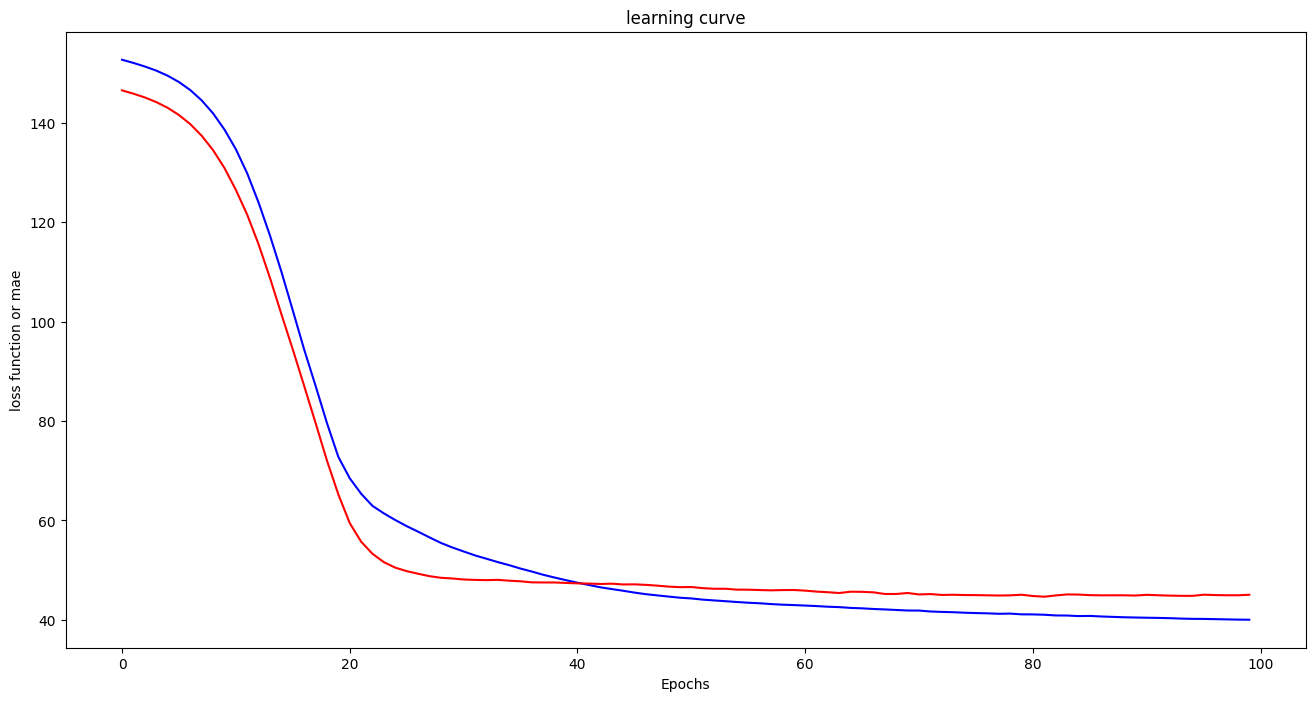

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(hist.history["loss"],c ="blue")
plt.plot(hist.history["val_loss"],c="red")
plt.xlabel("Epochs")
plt.ylabel("loss function or mae")
plt.title("learning curve")
plt.show()

In [ ]:
tr_pred =n_n.predict(xtrain)
ts_pred = n_n.predict(xtest)

3/3 [==============================] - 0s 2ms/step


In [ ]:
ts_pred[0:5]

array([[378.45978],
       [188.72786],
       [122.15833],
       [166.21321],
       [127.41522]], dtype=float32)

In [ ]:
#loss function use n_n.evaluation
n_n.evaluate(xtrain,ytrain)

12/12 [==============================] - 0s 1ms/step - loss: 40.9915


40.991546630859375

In [ ]:
n_n.evaluate(xtest,ytest)

3/3 [==============================] - 0s 3ms/step - loss: 43.2812


43.281219482421875

In [ ]:
#training
# rmse,mae,r2score,adjr2 score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
tr_mae =mean_absolute_error(ytrain,tr_pred)
tr_mse =mean_squared_error(ytrain,tr_pred)
tr_r2 = r2_score(ytrain, tr_pred)

print("training_mae:",round(tr_mae,2))
print("training_mse:" ,round(tr_mse,2))
print("training_r2:", round(tr_r2,2))

training_mae: 40.99
training_mse: 2873.45
training_r2: 0.53


In [ ]:

#Testing
ts_mae =mean_absolute_error(ytest,ts_pred)
ts_mse =mean_squared_error(ytest,ts_pred)
tr_r2 = r2_score(ytest, ts_pred)

print("testing_mae:",round(ts_mae,2))
print("testing_mse:" ,round(ts_mse,2))
print("training_r2:", round(tr_r2,2))

testing_mae: 43.28
testing_mse: 2766.17
training_r2: 0.47
